In [1]:
import numpy as np
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

!ls /content/drive/

Mounted at /content/drive
MyDrive  Shareddrives


In [3]:
!ls -l /content/drive/MyDrive/

total 30327
-rw------- 1 root root     174 Sep  6 20:42 '5052 Practicum.gdoc'
-rw------- 1 root root 2011330 Sep 13 00:07 'Class 2 Python-for-Data-Analysis.pdf'
drwx------ 2 root root    4096 Oct  7 23:01 'Colab Notebooks'
-rw------- 1 root root   94708 Oct 18 20:56 'Copy_of_[Titanic]_Model_Submission_Guide (1).ipynb'
-rw------- 1 root root     174 Oct  6 03:02 'Cynthia_Chen5021 Reaction Memo response question 1.gdoc'
-rw------- 1 root root  117746 Oct  9 01:05  Cynthia_Chen_HW1.ipynb
-rw------- 1 root root  308766 Oct 10 03:05  Cynthia_Chen_HW2_part1.ipynb
-rw------- 1 root root  228319 Oct 23 20:01  Cynthia_Chen_Midterm.ipynb
-rw------- 1 root root     174 Sep 27 21:25 'Cynthia_Chen_Reflection Memo .gdoc'
-rw------- 1 root root     174 Oct  4 18:04 'Cynthia_Chen_Write Up Proposed 3 Individual Ideas.gdoc'
-rw------- 1 root root 2451346 Oct 11 17:55 'EOF Class Slides - Cap Structure - 10- 11 -23.pptx'
-rw------- 1 root root 1087719 Oct  4 18:37 'EOF Class Slides - Risk -10-4- 23.pptx'


In [4]:
##1.  Import the spam dataset and print the first six rows.
df = pd.read_csv('/content/drive/MyDrive/spam_dataset.csv')
df.head(6)

,word_freq_make:,word_freq_address:,word_freq_all:,word_freq_3d:,word_freq_our:,word_freq_over:,word_freq_remove:,word_freq_internet:,word_freq_order:,word_freq_mail:,...,char_freq_;:,char_freq_(:,char_freq_[:,char_freq_!:,char_freq_$:,char_freq_#:,capital_run_length_average:,capital_run_length_longest:,capital_run_length_total:,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
5,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,...,0.00,0.223,0.0,0.000,0.000,0.000,3.000,15,54,1


##2. The dependent variable is "spam" where one indicates that an email is spam and zero otherwise.  Which three variables in the dataset do you think will be important predictors in a model of spam?  Why?

I would like to examine *capital_run_length_average*,*capital_run_length_longest*, and *capital_run_length_total*. Because numerically, they have the most entries; empiricallt, spam emails may use extensive capital letters to attract attention.



Text(0, 0.5, 'Frequency')

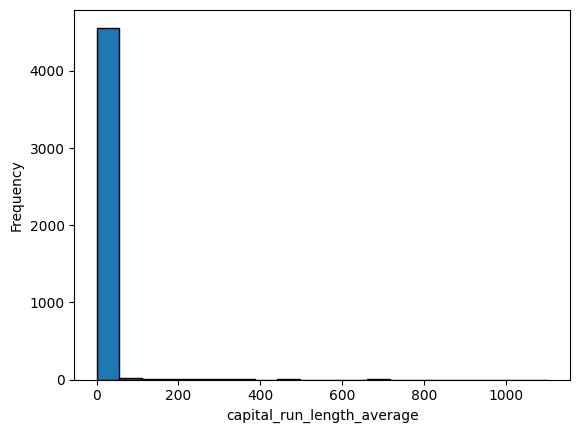

In [8]:
##3.  Visualize the univariate distribution of each of the variables in the previous question.
from matplotlib import pyplot as plt
plt.hist(df['capital_run_length_average:'], bins=20, edgecolor='k')
plt.xlabel('capital_run_length_average')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

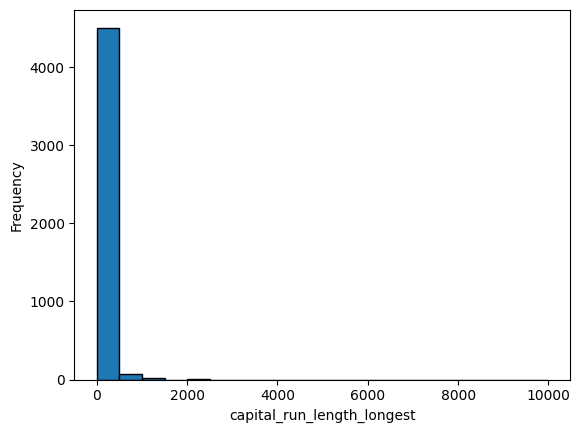

In [9]:
plt.hist(df['capital_run_length_longest:'], bins=20, edgecolor='k')
plt.xlabel('capital_run_length_longest')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

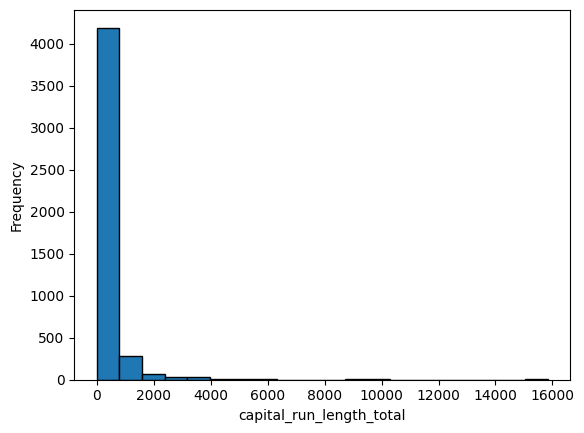

In [10]:
plt.hist(df['capital_run_length_total:'], bins=20, edgecolor='k')
plt.xlabel('capital_run_length_total')
plt.ylabel('Frequency')

##4. Name each of the supervised learning models that we have learned thus far that are used to predict dependent variables like "spam".   
For a binary classification task, we have learned the following models:

KNN for classification, logistic regression, support vector machines, decision trees(random forest)

##5. Describe the importance of training and test data.  Why do we separate data into these subsets?

The aim of machine learning is to use existing data to predict future occurance. But before we can apply our model to new measurements, we need to know whether it actually works—that is, whether we should trust its predictions.

We can't use the data for model building (train data) to evaluate the model, because our model "remembers" the training data. To assess the model’s performance, we show it new data (data that it hasn’t seen before) for which we have labels(test data).

Typically, this process involves dividing the labeled data we've gathered into two distinct portions. One portion of the data serves as the foundation for constructing our machine learning model and is referred to as the ***training data or training set***. The remaining portion is reserved for evaluating the model's performance, and it goes by the names ***test data, test set, or hold-out set.***

##6. What is k-fold cross validation and what do we use it for?
In cross validation, the data is split repeatedly and multiple models are trained. K-fold refers to the process that the data is first partitioned into k parts of (approximately) equal size, called folds. Next, a sequence of models is trained. The first model is trained using the first fold as the test set, and the remaining folds (2–k) are used as the training set. The process is then repeated until every folds acted as the test fold. For each of these k splits of the data into training and test sets, we compute the accuracy. In the end, we have collected k accuracy values.

K-fold cross validation is used for better model evaluation, hyperparameter tuning and better data efficiency.

##7. How is k-fold cross validation different from stratified k-fold cross validation?

K-fold simply divides the dataset into k folds, whereas stratified is to ensure that each fold of dataset has the same proportion of observations with a given label.

For example, if 90% of the samples belong to class A and 10% of the samples belong to class B, then stratified cross-validation ensures that in each fold, 90% of samples belong to class A and 10% of samples belong to class B.

It is usually a good idea to use stratified k-fold cross-validation instead of k-fold cross-validation to evaluate a classifier, because it results in more reliable estimates of generalization performance.

##8. Choose one model from question four.  Split the data into training and test subsets.  Build a model with the three variables in the dataset that you think will be good predictors of "spam".

##KNN classifier

In [11]:
##data cleaning
df2=df[['capital_run_length_average:','capital_run_length_longest:','capital_run_length_total:','spam']]
df2.head()

,capital_run_length_average:,capital_run_length_longest:,capital_run_length_total:,spam
0,3.756,61,278,1
1,5.114,101,1028,1
2,9.821,485,2259,1
3,3.537,40,191,1
4,3.537,40,191,1


In [12]:
##set IV and DV
y=df2[['spam']]
X=df2.loc[:, df2.columns != 'spam']

print(y[0:5])
X.head()

   spam
0     1
1     1
2     1
3     1
4     1


,capital_run_length_average:,capital_run_length_longest:,capital_run_length_total:
0,3.756,61,278
1,5.114,101,1028
2,9.821,485,2259
3,3.537,40,191
4,3.537,40,191


##8.Train test split

In [13]:
from sklearn.model_selection import train_test_split

# Use train_test_split(X,y) to create four new data sets, defaults to .75/.25 split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3)

X_train.head()

,capital_run_length_average:,capital_run_length_longest:,capital_run_length_total:
3064,18.000,200,378
2298,1.983,25,601
1113,2.200,11,44
2215,1.100,2,11
2477,2.093,11,90


##8.A) On test data directly

In [14]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

print(knn.score(X_test, y_test))

0.7445699391833188


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [15]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

print(knn.score(X_test, y_test))

0.7558644656820156


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [16]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)

print(knn.score(X_test, y_test))

0.7523892267593397


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


##8.B) using k-fold cross-validation(kfold v.s. stratified kfold)  

In [22]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold

kfold = KFold(n_splits=5)
skfold = StratifiedKFold(n_splits=5, shuffle=True)

print("KFold: "+str(cross_val_score(KNeighborsClassifier(n_neighbors=7), X_test, y_test, cv=kfold).mean()))

print("StratifiedKFold:\n{}".format(
cross_val_score(KNeighborsClassifier(n_neighbors=7), X_test, y_test, cv=skfold).mean()))

KFold: 0.7176548089591568
StratifiedKFold:
0.7150348202522115


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

##8.Tuning models with grid search

In [18]:
np.arange(1, 15, 2)

array([ 1,  3,  5,  7,  9, 11, 13])

In [19]:
from sklearn.model_selection import GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3)

param_grid = {'n_neighbors': [1,3,5,7,9,10,11,13] }

grid = GridSearchCV(KNeighborsClassifier(), param_grid=param_grid, cv=kfold)

grid.fit(X_train, y_train)

print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))
print("test-set score: {:.3f}".format(grid.score(X_test, y_test)))

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

best mean cross-validation score: 0.761
best parameters: {'n_neighbors': 7}
test-set score: 0.752


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


##8.Conclusion
I choose to select k=7 for several reasons. First, it is an odd number which allows to avoid ties. Second, k=7 positively affects the model's accuracy when using k-folds cross validation. Lastly, it also aligns with the result for our grid search.

##9. Choose a second model from question four.  Using the same three variables in the dataset that you think will be good predictors of "spam".

##logistic regression

##9.A) On test data directly

In [20]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(penalty='none').fit(X_train, y_train)

print("logreg.coef_: {}".format(logreg .coef_))

print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))

predicted_vals = logreg.predict(X_test)
print("logreg.predict: {}".format(predicted_vals))


logreg.coef_: [[6.90924118e-02 2.08583225e-02 6.07077867e-05]]
Training set score: 0.735
Test set score: 0.739
logreg.predict: [1 0 0 ... 0 0 0]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [21]:
logreg = LogisticRegression(penalty='l2').fit(X_train, y_train)

print("logreg.coef_: {}".format(logreg .coef_))

print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))

predicted_vals = logreg.predict(X_test)
print("logreg.predict: {}".format(predicted_vals))


logreg.coef_: [[6.90524383e-02 2.08600511e-02 6.06989517e-05]]
Training set score: 0.734
Test set score: 0.739
logreg.predict: [1 0 0 ... 0 0 0]


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## Logistic Regression with constraints on size of coefficients

In [22]:
logreg = LogisticRegression(C=1, penalty='l2').fit(X_train, y_train)

print("logreg.coef_: {}".format(logreg .coef_))

print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))

predicted_vals = logreg.predict(X_test)
print("logreg.predict: {}".format(predicted_vals))

logreg.coef_: [[6.90524383e-02 2.08600511e-02 6.06989517e-05]]
Training set score: 0.734
Test set score: 0.739
logreg.predict: [1 0 0 ... 0 0 0]


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [23]:
logreg = LogisticRegression(C=10, penalty='l2').fit(X_train, y_train)

print("logreg.coef_: {}".format(logreg .coef_))

print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))

predicted_vals = logreg.predict(X_test)
print("logreg.predict: {}".format(predicted_vals))

logreg.coef_: [[6.90877562e-02 2.08584663e-02 6.07074900e-05]]
Training set score: 0.735
Test set score: 0.739
logreg.predict: [1 0 0 ... 0 0 0]


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [24]:
logreg = LogisticRegression(C=.0001, penalty='l2').fit(X_train, y_train)

print("logreg.coef_: {}".format(logreg .coef_))

print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))

predicted_vals = logreg.predict(X_test)
print("logreg.predict: {}".format(predicted_vals))

logreg.coef_: [[1.24948125e-02 2.31306882e-02 5.46083913e-05]]
Training set score: 0.726
Test set score: 0.732
logreg.predict: [1 0 0 ... 0 0 0]


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


##9.B) using k-fold cross-validation

In [23]:
print("KFold: "+str(cross_val_score(LogisticRegression(C=1, penalty='l2'), X_test, y_test, cv=kfold).mean()))
print("StratifiedKFold:\n{}".format(
cross_val_score(LogisticRegression(C=1, penalty='l2'), X_test, y_test, cv=skfold).mean()))

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

KFold: 0.7472426124600038
StratifiedKFold:
0.7402032749858837


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


##9.Tuning models with grid search

In [24]:
from sklearn.model_selection import GridSearchCV

logistic_model = LogisticRegression()
penalized_logistic_model = LogisticRegression(penalty='l2')

penalized_logistic_param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.01, 0.1, 1.0, 10.0,100.0],
    'solver': ['liblinear']
}

logistic_param_grid = {
    'C': [0.01, 0.1, 1.0, 10.0,100.0],
    'solver': ['liblinear']
}

penalized_logistic_grid_search = GridSearchCV(penalized_logistic_model, penalized_logistic_param_grid, cv=skfold, scoring='accuracy')
logistic_grid_search = GridSearchCV(logistic_model, logistic_param_grid, cv=skfold, scoring='accuracy')

penalized_logistic_grid_search.fit(X_train,y_train)
logistic_grid_search.fit(X_train, y_train)

best_penalized_logistic_params = penalized_logistic_grid_search.best_params_
best_penalized_logistic_score = penalized_logistic_grid_search.best_score_

best_logistic_params = logistic_grid_search.best_params_
best_logistic_score = logistic_grid_search.best_score_

print("Best Penalized Logistic Regression Parameters:", best_penalized_logistic_params)
print("Best Penalized Logistic Regression Score (Accuracy):", best_penalized_logistic_score)

print("Best Logistic Regression Parameters:", best_logistic_params)
print("Best Logistic Regression Score (Accuracy):", best_logistic_score)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

Best Penalized Logistic Regression Parameters: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
Best Penalized Logistic Regression Score (Accuracy): 0.7301449275362318
Best Logistic Regression Parameters: {'C': 1.0, 'solver': 'liblinear'}
Best Logistic Regression Score (Accuracy): 0.7333333333333334


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

##9. Conclusion

In this question, I choose to use l2 penalty and C=1.0. Since C=1.0 is a relatively small value of C, that can result in stronger regularization. Also, since we are currently only using three meaningful parameters to predict, l1 penalty doesn't fit since there are little comfounders.

This model doesn't improve the prediction comparing with the last one (current with stratified k-fold 0.7359420289855072, last one 0.7484057971014492).

##10.Choose a third model from question four.  Using the same three variables in the dataset that you think will be good predictors of "spam".

##support vector machines

##10.A) On test data directly

In [11]:
from sklearn.svm import SVC

svm = SVC(kernel='linear')
svm.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(kernel='linear')

In [32]:
y_pred = svm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

Test Accuracy: 0.741094700260643


##10.B)using k-fold cross-validation

In [33]:
print("KFold: "+str(cross_val_score(svm, X_test, y_test, cv=kfold).mean()))
print("StratifiedKFold:\n{}".format(cross_val_score(svm, X_test, y_test, cv=skfold).mean()))

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

KFold: 0.7310144927536232


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

StratifiedKFold:
0.7307246376811595


##10.Conclusion
I choose linear kernel in this model for interpretability and efficiency. This model has not improve significantly since the last one(Last with stratified k-fold is 0.7359420289855072, and current is 0.7301449275362318).

##11. Choose a fourth model from question four.  Using the same three variables in the dataset that you think will be good predictors of "spam".

##Decision Tree

##11.A) On test data directly

In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
import matplotlib.pyplot as plt

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [26]:
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

Test Accuracy: 0.7775847089487402


##11.B) using k-fold cross-validation

In [27]:
print("KFold: "+str(cross_val_score(clf, X_test, y_test, cv=kfold).mean()))
print("StratifiedKFold:\n{}".format(cross_val_score(clf, X_test, y_test, cv=skfold).mean()))

KFold: 0.7281046489742142
StratifiedKFold:
0.7367777150385846


##11.Conclusion

The decision tree model is byfar the one with highest accuracy score. I have not used particular parameter on this one.

##12. Now rerun your best model from questions 8 through 11, but this time add three new variables to the model that you think will increase prediction accuracy.    

In [28]:
df3=df[['capital_run_length_average:','capital_run_length_longest:','capital_run_length_total:','word_freq_credit:','word_freq_money:','char_freq_$:','spam']]

In [29]:
##set IV and DV
y=df3[['spam']]
X=df3.loc[:, df3.columns != 'spam']

print(y[0:5])
X.head()

   spam
0     1
1     1
2     1
3     1
4     1


,capital_run_length_average:,capital_run_length_longest:,capital_run_length_total:,word_freq_credit:,word_freq_money:,char_freq_$:
0,3.756,61,278,0.00,0.00,0.000
1,5.114,101,1028,0.00,0.43,0.180
2,9.821,485,2259,0.32,0.06,0.184
3,3.537,40,191,0.00,0.00,0.000
4,3.537,40,191,0.00,0.00,0.000


In [30]:
##Train test split with new data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3)

X_train.head()

,capital_run_length_average:,capital_run_length_longest:,capital_run_length_total:,word_freq_credit:,word_freq_money:,char_freq_$:
3064,18.000,200,378,0.0,0.0,0.0
2298,1.983,25,601,0.0,0.0,0.0
1113,2.200,11,44,0.0,0.0,0.0
2215,1.100,2,11,0.0,0.0,0.0
2477,2.093,11,90,0.0,0.0,0.0


In [36]:
##Fitting the decision tree model
clf2 = DecisionTreeClassifier()
clf2.fit(X_train, y_train)

DecisionTreeClassifier()

In [37]:
y_pred = clf2.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

Test Accuracy: 0.8010425716768028


##12.Did this model predict test data better than your previous models?

Yes, it did.


##13. Rerun all your other models with this final set of six variables, evaluate prediction error, and choose a final model.  



In [31]:
##KNN Classification
kfold = KFold(n_splits=5)
skfold = StratifiedKFold(n_splits=5, shuffle=True)

print("KFold: "+str(cross_val_score(KNeighborsClassifier(n_neighbors=7), X_test, y_test, cv=kfold).mean()))
print("StratifiedKFold:\n{}".format(
cross_val_score(KNeighborsClassifier(n_neighbors=7), X_test, y_test, cv=skfold).mean()))

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

KFold: 0.7150461133069828
StratifiedKFold:
0.7245812158855637


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [39]:
##Logistic regression
logreg = LogisticRegression(C=1, penalty='l2').fit(X_train, y_train)

print("logreg.coef_: {}".format(logreg .coef_))

print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))

predicted_vals = logreg.predict(X_test)
print("logreg.predict: {}".format(predicted_vals))

logreg.coef_: [[5.52693054e-02 1.37724979e-02 2.78934332e-05 2.05970702e+00
  1.44111962e+00 7.50575664e+00]]
Training set score: 0.817
Test set score: 0.811
logreg.predict: [1 0 0 ... 0 0 0]


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [20]:
##SVM
from sklearn.svm import SVC

svm = SVC(kernel='linear')
svm.fit(X_train, y_train)

print("KFold: "+str(cross_val_score(svm, X_test, y_test, cv=kfold).mean()))
print("StratifiedKFold:\n{}".format(cross_val_score(svm, X_test, y_test, cv=skfold).mean()))

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

KFold: 0.826086956521739


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

StratifiedKFold:
0.8194202898550724


##13.Why did you select this model among all of the models that you ran?  
For the final model, I would like to select the logistic regression model. Because it has the best accuracy score amongst the resonable computation power required. It is not over-fitting.

##14. What variable that currently is not in your model, if included, would be likely to increase your final model's predictive power?  For this answer try to speculate about a variable outside the variables available in the data that would improve you model.

I would speculate that the variable "word_freq_all: " could improve my model. Because firstly it has extensive data points, which provides great training opportunities. Secondly, it has a rather uniform distribution with little outliers, thus increasing internal validaty.

##15. Lastly, you have listed each of the models that we have learned to use to predict dependent variables like spam.  List each model we have focused on in class thus far that you could use to evaluate data with a continuous dependent variable.

KNN regression, linear regression(lasso, ridge), decision tree regressor(random forest regressor, bagging regressor)